In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy.interpolate import LSQUnivariateSpline

import warnings
warnings.filterwarnings("ignore")

1 a)

In [2]:
data = pd.read_csv('data/strongdrink.txt')

X = data[['alco','malic','tot_phen','color_int']]
y = data['cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

result = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
pd.DataFrame({"j=1":np.append(result.intercept_[0],result.coef_[0]),
              "j=2":np.append(result.intercept_[1],result.coef_[1])},
               index=["beta0","beta1",'beta2','beta3','beta4'])

,j=1,j=2
beta0,-24.027617,22.780733
beta1,1.701734,-1.466297
beta2,-0.265788,-0.332951
beta3,1.224101,0.663556
beta4,0.022507,-0.922682


In [3]:
y_pred = result.predict(X_test)
print(classification_report(y_test, y_pred))
MSE_val= ((y_test != y_pred) ** 2).mean()
data["cultivar"].value_counts()

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



2    71
1    59
3    46
Name: cultivar, dtype: int64

For group 1, 2, and 3, the error rates are 13%, 0%, and 0%.
The model is best predicts the third group with the highest f1-score, while the third group is not the one with the most observations.

In [4]:
print('MSE for the test set is', MSE_val)

MSE for the test set is 0.045454545454545456


b)

In [5]:
X=data[["alco","malic","tot_phen","color_int"]].values
y=data["cultivar"].values

N_loo = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(X)
MSE_vec = np.zeros(N_loo)

ypred = np.zeros(X.shape[0])

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred
    if y_test == y_pred:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1
        
print(classification_report(y, ypred))
MSE_loo = MSE_vec.mean()
# print(classification_report(yvals, y_pred_list.astype('int')))
print('The estimate MSE loocv of the test =', MSE_loo)


              precision    recall  f1-score   support

           1       0.90      0.93      0.92        59
           2       0.91      0.90      0.91        71
           3       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176

The estimate MSE loocv of the test = 0.07954545454545454


For group 1,2, and 3, the error rates are 10%, 9%, and 4%, which is slighly higher than those from part (a).

c)

In [6]:
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(X)

MSE_vec_kf = np.zeros(4)

k_ind = int(0)
ypred = np.zeros(X.shape[0])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    k_ind += 1
MSE_kf = MSE_vec_kf.mean()
print(classification_report(y, ypred))
print('The estimate MSE loocv of the test =', MSE_kf)


              precision    recall  f1-score   support

           1       0.78      0.73      0.75        59
           2       0.79      0.85      0.82        71
           3       0.96      0.93      0.95        46

   micro avg       0.83      0.83      0.83       176
   macro avg       0.84      0.84      0.84       176
weighted avg       0.83      0.83      0.83       176

The estimate MSE loocv of the test = 0.17045454545454544


For group 1,2, and 3, the error rates are 22%, 21%, and 4%. 
The error rates for group 1 and 2 is greater than those from part (b), but the error rate for group 3 is the same as the one from part (b). 
The error rate for group 1, 2, and 3 are greater than those from part (a).

2 a)

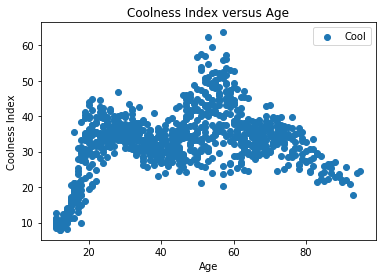

In [7]:
data=pd.read_csv("data/CoolIndex.txt",names=["Age","Cool"])

fig,ax = plt.subplots()
plt.scatter(data.Age,data.Cool)
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index versus Age")
ax.legend()
plt.show()


b)

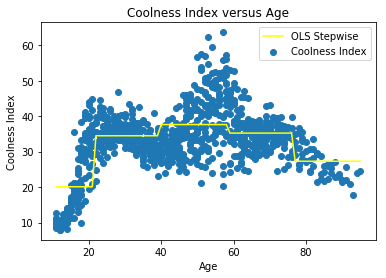

                            OLS Regression Results                            
Dep. Variable:                   Cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          3.73e-114
Time:                        01:20:28   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
b1            20.1025      0.562     35.746      0.0

In [8]:
data["b1"]=np.where((data.Age>=11) & (data.Age<22),1,0)
data["b2"]=np.where((data.Age>=22) & (data.Age<40),1,0)
data["b3"]=np.where((data.Age>=40) & (data.Age<59),1,0)
data["b4"]=np.where((data.Age>=59) & (data.Age<77),1,0)
data["b5"]=np.where((data.Age>=77) & (data.Age<=95),1,0)


X=data[["b1", "b2", "b3", "b4", "b5"]]
res=sm.OLS(data.Cool, X).fit()

plt.scatter(data.Age,data.Cool,label="Coolness Index")
plt.plot(data.Age,res.predict(),"yellow",label = "OLS Stepwise")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index versus Age")
plt.legend()
plt.show()

print(res.summary())
print()
print("The predicted coolness of a 73-year old from the stepwise function is", res.predict([0,0,0,1,0])[0])

c)

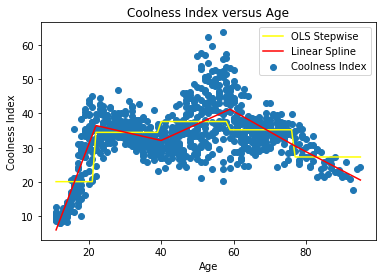

The predicted coolness index of a 73-year-old person from the linear spline is 32.86784862349653


In [9]:
data_c=data.groupby('Age').mean()
data_c['Age']=data_c.index

lsq_result=LSQUnivariateSpline(np.array(data_c.Age), np.array(data_c.Cool), t = [22,40,59,77], k = 1)

plt.scatter(data.Age,data.Cool,label="Coolness Index")
plt.plot(data.Age,res.predict(),"yellow",label = "OLS Stepwise")
plt.plot(data_c.Age,lsq_result(data_c.Age),"r",label = "Linear Spline")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index versus Age")
plt.show()

print("The predicted coolness index of a 73-year-old person from the linear spline is", lsq_result(73))

d)

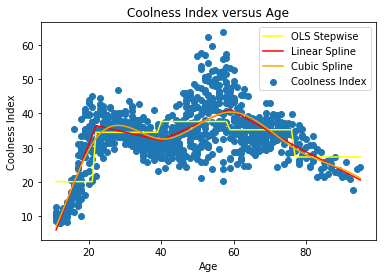

The predicted coolness index of a 73-year-old person from the linear spline is 32.642301066279764


In [10]:
lsq_result_new=LSQUnivariateSpline(np.array(data_c.Age), np.array(data_c.Cool), t=[22,40,59,77], k=3)


plt.scatter(data.Age,data.Cool, label="Coolness Index")
plt.plot(data.Age,res.predict(),"yellow",label = "OLS Stepwise")
plt.plot(data_c.Age,lsq_result(data_c.Age),"r",label = "Linear Spline")
plt.plot(data_c.Age,lsq_result_new(data_c.Age),"orange",label = "Cubic Spline")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index versus Age")
plt.show()

print("The predicted coolness index of a 73-year-old person from the linear spline is", lsq_result_new(73))